In [1]:
import numpy as np
import scipy.stats
def JS_divergence(p,q):
    M=(p+q)/2
    return 0.5*scipy.stats.entropy(p,M)+0.5*scipy.stats.entropy(q, M)

p=np.asarray([1/3,1/3,1/3])
q=np.array([0.6,0.25,0.1,0.05])
q2=np.array([0.1,0.2,0.3,0.4])

print(JS_divergence(p, q))  # 0.003093977084273652
print(JS_divergence(p, q2)) # 0.24719159952098618
print(JS_divergence(p, p)) # 0.0

0.003093977084273652
0.24719159952098618
0.0


In [20]:
JS_divergence(np.asarray([0.4, 0, 0.6]), np.asarray([0.7, 0.3, 0]))

0.3326322049141792

In [18]:
# p = [[0.7, 0.3, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0.4, 0, 0.6]]
p = np.array([[1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3]])
z = np.zeros([5,5])
for i in range(len(p)):
    for j in range(i+1, len(p)):
        z[i][j] = JS_divergence(p[i], p[j])
z, sum(sum(z))

(array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]), 0.0)

In [17]:
p = np.array([[0.7, 0.3, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0.4, 0, 0.6]])
# p = np.array([[1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3]])
z = np.zeros([5,5])
for i in range(len(p)):
    for j in range(i+1, len(p)):
        z[i][j] = JS_divergence(p[i], p[j])
z, sum(sum(z))

(array([[0.        , 0.11727694, 0.34201449, 0.69314718, 0.3326322 ],
        [0.        , 0.        , 0.69314718, 0.69314718, 0.27435847],
        [0.        , 0.        , 0.        , 0.69314718, 0.69314718],
        [0.        , 0.        , 0.        , 0.        , 0.16389659],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 4.6959145910834605)

In [19]:
p = np.array([[0.6745365534609943, 0.3097152655805989, 0.015748180958406712], 
              [0.03506069529884873, 0.45935833071102117, 0.50558097399013], 
              [0.036045189642076654, 0.9003936556466159, 0.06356115471130762], 
              [0.5207414864240862, 0.042759237775289345, 0.4364992758006243], 
              [0.42747308425698943, 0.04838692241593291, 0.5241399933270776]])
# p = np.array([[1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3]])
z = np.zeros([5,5])
for i in range(len(p)):
    for j in range(i+1, len(p)):
        z[i][j] = JS_divergence(p[i], p[j])
z, sum(sum(z))

(array([[0.        , 0.32880737, 0.25795925, 0.18455864, 0.21869021],
        [0.        , 0.        , 0.13406747, 0.22940139, 0.19441128],
        [0.        , 0.        , 0.        , 0.44413338, 0.43356564],
        [0.        , 0.        , 0.        , 0.        , 0.00438584],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 2.4299804884189227)

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')  #生成eps
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import shutil
import os
import pandas as pd
sns.set_style('whitegrid')

D:\Applications\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:118: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


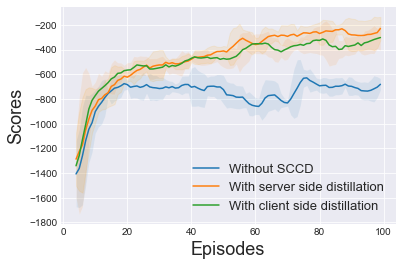

In [9]:
#dist std=1
n = 5
plt.style.use("seaborn-darkgrid")
# plt.figure(figsize=(9,7))
model_path = './outputs/fed_model/ablation/'  #fedavg
# return_list4 = np.load(model_path+"niidevalfed3e4_pendulum5_N20_M2_L20_beta0_mu0server_clientnum5.npy") #N(0,0.5) noise
return_list4 = np.load(model_path+"Ablat_niidevalfedstd2_noicyFalse_20000_pendulum5_N100_M2_L100_beta0_mu0_dual_False_lrdecayFalse_line_4.npy") #N(0,0.5) noise
# return_list4 = np.load(model_path+"Ablat_v2_distilstd2_noicyFalse_20000_pendulum5_N100_M2_L100_dualFalse_reweightFalse0.3_distepoch20_lrdecayFalse_line_4.npy")
rounds_list4 = list(range(len(return_list4)))
mean4 = pd.Series(return_list4).rolling(n).mean()
std4=pd.Series(return_list4).rolling(n).std() 


# return_list5 = np.load(model_path+"centerniidstd1_32000_pendulum5_M2server_clientnpum5.npy") #N(0,0.5) noise
return_list5 = np.load(model_path+"Ablat_disttrue_v2_distilstd2_noicyFalse_20000_pendulum5_N100_M2_L100_dualFalse_reweightFalse0.3_distepoch20_lrdecayFalse_line_4.npy") #N(0,0.5) noise
return_list5 = return_list5[:150]
rounds_list5 = list(range(len(return_list5)))
mean5 = pd.Series(return_list5).rolling(n).mean()
std5=pd.Series(return_list5).rolling(n).std() 



# return_list7 = np.load(model_path+"niidevalfedstd1_noicyFalse_30000_pendulum5_N100_M2_L100_beta0_mu0.01_dual_Falseserver_clientnum5.npy") #N(0,0.5) noise
return_list7 = np.load(model_path+"Ablat_v3_distilstd2_noicyFalse_20000_pendulum5_N100_M2_L100_criticdualTrue0.1_epc20_lr0.002_actordualFalse0.9_reweightFalse0.3_distepoch20_lrdecayFalse_line_4.npy") #N(0,0.5) noise

rounds_list7 = list(range(len(return_list7)))
mean7 = pd.Series(return_list7).rolling(n).mean()
std7=pd.Series(return_list7).rolling(n).std() 

# model_path = './outputs/fed_model/pendulum/' #fedprox
# return_list8 = np.load(model_path+"niidevalfedstd1_noicyFalse_20000_pendulum5_N100_M2_L100_beta0.01_mu0_dual_False_lrdecayFalse_line_4.npy") #N(0,0.5) noise
# rounds_list8 = list(range(len(return_list8)))
# mean8 = pd.Series(return_list8).rolling(n).mean()
# std8=pd.Series(return_list8).rolling(n).std() 

# return_list9 = np.load(model_path+"fedscaffold_std1_noiseFalse_pendulum5_N100_M2_L100server_clientnum5.npy") #N(0,0.5) noise
# rounds_list9 = list(range(len(return_list9)))
# mean9 = pd.Series(return_list9).rolling(n).mean()
# std9=pd.Series(return_list9).rolling(n).std() 

# #dist stat
# # return_list10 = np.load(model_path+"v2_distilstd1_noicyFalse_30000_pendulum5_N100_M2_L100_dualFalse_reweight0.3_distepoch20server_clientnum5.npy") #N(0,0.5) noise
# return_list10 = np.load(model_path+"v2_distilstd1_noicyFalse_20000_pendulum5_N100_M2_L100_dualFalse_reweightFalse0.3_distepoch20_lrdecayFalse_line_4.npy") #N(0,0.5) noise
# # return_list10 = np.load(model_path+"noreiweightv2_distilstd1_noicyFalse_30000_pendulum5_N100_M2_L100_dualFalse_reweight0.3_distepoch20server_clientnum5.npy") #N(0,0.5) noise
# rounds_list10 = list(range(len(return_list10)))
# mean10 = pd.Series(return_list10).rolling(n).mean()
# std10=pd.Series(return_list10).rolling(n).std()


plt.plot(rounds_list4, mean4, label="Without SCCD")
plt.fill_between(range(len(return_list4)),
                 mean4-1.96*std4,
                 mean4+1.96*std4,
#                  color='b',
                 alpha=0.1)


plt.plot(rounds_list5, mean5,label="With server side distillation")
plt.fill_between(range(len(return_list5)),
                 mean5-1.96*std5,
                 mean5+1.96*std5,
                 color='orange',
                 alpha=0.1)

plt.plot(rounds_list7,mean7, label="With client side distillation")
plt.fill_between(range(len(return_list7)),
                 mean7-1.96*std7,
                 mean7+1.96*std7,
#                  color='g',
                 alpha=0.1)

# plt.plot(rounds_list8,mean8,label="FedProx")
# plt.fill_between(range(len(return_list8)),
#                  mean8-1.96*std8,
#                  mean8+1.96*std8,
# #                  color='r',
#                  alpha=0.1)

# plt.plot(rounds_list9,mean9,label="Scaffold")
# plt.fill_between(range(len(return_list9)),
#                  mean9-1.96*std9,
#                  mean9+1.96*std9,
#                  color='purple',
#                  alpha=0.1)

# #dist stat
# plt.plot(rounds_list10,mean10,label="distil v2")
# plt.fill_between(range(len(return_list10)),
#                  mean10-1.96*std10,
#                  mean10+1.96*std10,
#                  color='brown',
#                  alpha=0.1)

# plt.plot(rounds_list11,mean11,label="distil")
# plt.fill_between(range(len(return_list11)),
#                  mean11-1.96*std11,
#                  mean11+1.96*std11,
#                  color='yellow',
#                  alpha=0.1)

# plt.plot(rounds_list12,mean12,label="distil v3")
# plt.plot(rounds_list12,mean12,label="SCCD")
# plt.fill_between(range(len(rounds_list12)),
#                  mean12-1.96*std12,
#                  mean12+1.96*std12,
# #                  color='brown',
#                  alpha=0.1)

plt.xlabel('Episodes', fontsize=18)
plt.ylabel('Scores', fontsize=18)
# plt.title("N20_M2_L20_server_clientnum5")
# plt.title("Pendulum")
# plt.title('DQN on {}'.format(env_name))
plt.legend(loc='lower right', fontsize=13) # 图例在图形里面
# plt.legend(loc=8, frameon=False, bbox_to_anchor=(0.5,-0.3))# 图例在图形外面
# plt.rcParams.update({'font.size':12})
# plt.savefig("./fig/pend.jpg")
plt.show()
plt.savefig(fname="./fig/abla_pend.pdf",format="pdf")

D:\Applications\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:118: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


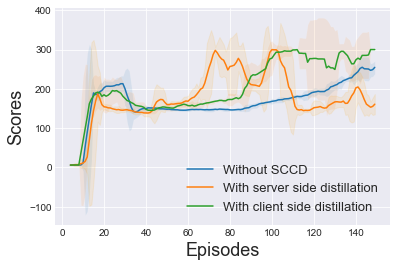

In [10]:
#cart
n = 5
plt.style.use("seaborn-darkgrid")
# plt.figure(figsize=(9,7))
model_path = './outputs/fed_model/ablation/'  #fedavg
# return_list4 = np.load(model_path+"niidevalfed3e4_pendulum5_N20_M2_L20_beta0_mu0server_clientnum5.npy") #N(0,0.5) noise
return_list4 = np.load(model_path+"niidevalfedstd0.05_noicyFalse_30000_cart5_N100_M2_L100_beta0_mu0_dual_False_lrdecayFalse_line_2.npy") #N(0,0.5) noise
# return_list4 = np.load(model_path+"Ablat_v2_distilstd2_noicyFalse_20000_pendulum5_N100_M2_L100_dualFalse_reweightFalse0.3_distepoch20_lrdecayFalse_line_4.npy")
rounds_list4 = list(range(len(return_list4)))
mean4 = pd.Series(return_list4).rolling(n).mean()
std4=pd.Series(return_list4).rolling(n).std() 


# return_list5 = np.load(model_path+"centerniidstd1_32000_pendulum5_M2server_clientnpum5.npy") #N(0,0.5) noise
return_list5 = np.load(model_path+"Ablat_disttrue_v2_distilstd0.05_noicyFalse_30000_cart5_N100_M2_L100_dualFalse_reweightFalse0.5_distepoch10_lrdecayFalse_line_2.npy") #N(0,0.5) noise
return_list5 = return_list5[:150]
rounds_list5 = list(range(len(return_list5)))
mean5 = pd.Series(return_list5).rolling(n).mean()
std5=pd.Series(return_list5).rolling(n).std() 



# return_list7 = np.load(model_path+"niidevalfedstd1_noicyFalse_30000_pendulum5_N100_M2_L100_beta0_mu0.01_dual_Falseserver_clientnum5.npy") #N(0,0.5) noise
return_list7 = np.load(model_path+"v3_distilstd0.05_noicyFalse_30000_cart5_N100_M2_L100_criticdualTrue0.1_epc40_lr0.002_actordualFalse0.9_reweightFalse0.9_distepoch10_lrdecayFalse_line_2.npy") #N(0,0.5) noise

rounds_list7 = list(range(len(return_list7)))
mean7 = pd.Series(return_list7).rolling(n).mean()
std7=pd.Series(return_list7).rolling(n).std() 

# model_path = './outputs/fed_model/pendulum/' #fedprox
# return_list8 = np.load(model_path+"niidevalfedstd1_noicyFalse_20000_pendulum5_N100_M2_L100_beta0.01_mu0_dual_False_lrdecayFalse_line_4.npy") #N(0,0.5) noise
# rounds_list8 = list(range(len(return_list8)))
# mean8 = pd.Series(return_list8).rolling(n).mean()
# std8=pd.Series(return_list8).rolling(n).std() 

# return_list9 = np.load(model_path+"fedscaffold_std1_noiseFalse_pendulum5_N100_M2_L100server_clientnum5.npy") #N(0,0.5) noise
# rounds_list9 = list(range(len(return_list9)))
# mean9 = pd.Series(return_list9).rolling(n).mean()
# std9=pd.Series(return_list9).rolling(n).std() 

# #dist stat
# # return_list10 = np.load(model_path+"v2_distilstd1_noicyFalse_30000_pendulum5_N100_M2_L100_dualFalse_reweight0.3_distepoch20server_clientnum5.npy") #N(0,0.5) noise
# return_list10 = np.load(model_path+"v2_distilstd1_noicyFalse_20000_pendulum5_N100_M2_L100_dualFalse_reweightFalse0.3_distepoch20_lrdecayFalse_line_4.npy") #N(0,0.5) noise
# # return_list10 = np.load(model_path+"noreiweightv2_distilstd1_noicyFalse_30000_pendulum5_N100_M2_L100_dualFalse_reweight0.3_distepoch20server_clientnum5.npy") #N(0,0.5) noise
# rounds_list10 = list(range(len(return_list10)))
# mean10 = pd.Series(return_list10).rolling(n).mean()
# std10=pd.Series(return_list10).rolling(n).std()


plt.plot(rounds_list4, mean4, label="Without SCCD")
plt.fill_between(range(len(return_list4)),
                 mean4-1.96*std4,
                 mean4+1.96*std4,
#                  color='b',
                 alpha=0.1)


plt.plot(rounds_list5, mean5,label="With server side distillation")
plt.fill_between(range(len(return_list5)),
                 mean5-1.96*std5,
                 mean5+1.96*std5,
                 color='orange',
                 alpha=0.1)

plt.plot(rounds_list7,mean7, label="With client side distillation")
plt.fill_between(range(len(return_list7)),
                 mean7-1.96*std7,
                 mean7+1.96*std7,
#                  color='g',
                 alpha=0.1)

# plt.plot(rounds_list8,mean8,label="FedProx")
# plt.fill_between(range(len(return_list8)),
#                  mean8-1.96*std8,
#                  mean8+1.96*std8,
# #                  color='r',
#                  alpha=0.1)

# plt.plot(rounds_list9,mean9,label="Scaffold")
# plt.fill_between(range(len(return_list9)),
#                  mean9-1.96*std9,
#                  mean9+1.96*std9,
#                  color='purple',
#                  alpha=0.1)

# #dist stat
# plt.plot(rounds_list10,mean10,label="distil v2")
# plt.fill_between(range(len(return_list10)),
#                  mean10-1.96*std10,
#                  mean10+1.96*std10,
#                  color='brown',
#                  alpha=0.1)

# plt.plot(rounds_list11,mean11,label="distil")
# plt.fill_between(range(len(return_list11)),
#                  mean11-1.96*std11,
#                  mean11+1.96*std11,
#                  color='yellow',
#                  alpha=0.1)

# plt.plot(rounds_list12,mean12,label="distil v3")
# plt.plot(rounds_list12,mean12,label="SCCD")
# plt.fill_between(range(len(rounds_list12)),
#                  mean12-1.96*std12,
#                  mean12+1.96*std12,
# #                  color='brown',
#                  alpha=0.1)

plt.xlabel('Episodes',fontsize=18)
plt.ylabel('Scores',fontsize=18)
# plt.title("N20_M2_L20_server_clientnum5")
# plt.title("Pendulum")
# plt.title('DQN on {}'.format(env_name))
plt.legend(loc='lower right',fontsize=13) # 图例在图形里面
# plt.legend(loc=8, frameon=False, bbox_to_anchor=(0.5,-0.3))# 图例在图形外面
# plt.rcParams.update({'font.size':15})
# plt.savefig("./fig/pend.jpg")
plt.show()
plt.savefig(fname="./fig/abla_cart.pdf",format="pdf")